학습 목표

그동안 우리가 주로 배워온 딥러닝 모델들이 주로 수행하는 작업들은 대부분 무언가(X)를 분류 하는 것들이었습니다.

이러한 분류 작업들을 위해서는 반드시 정답(y)으로 제시되는 분류기준이 필요합니다.

이렇게 정답 데이터를 통해 X가 무엇인지 분류하는 방법을 배우게 하는 지도학습(Supervised Learning)이라고 합니다.

그러나 명확한 정답 데이터가 라벨(label)로 달려있지 않은 수많은 데이터들을 우리는 어떻게 다룰수 있을까요?

그리고 그 데이터로부터 어떤 정보를 얻어낼 수 있을까요?

오늘은 비지도학습(Unsupervised Learning)에 대해서 알아보겠습니다.

비지도학습의 개념, 지도학습과 비지도학습의 차이, 주요 비지도학습 알고리즘에 대해 학습합니다.

클러스터링(1) K-means

K-means 알고리즘은 k값이 주어져 있을때, 주어진 데이터들을 k개의 클러스터로 묶는 알고리즘으로 대표적인 클러스터링 기법 중 하나입니다.

1.데이터생성

모듈을 import 하고 5개의 중심점을 기준으로 무작위 점 데이터 100개를 생서

In [1]:
%matplotlib inline
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

#중심점이 5개인 100개의 점 데이터를 무작위로 생성합니다.
points, labels = make_blobs(n_samples=100, centers=5, n_features=2, random_state=135)

print(points.shape, points[:10]) #무작위로 생성된 점의 좌표 10개 출력
print(labels.shape, labels[:10]) #10개의 점들이 각각 대응하는 중심점(label)값 출력


(100, 2) [[ 4.63411914 -6.52590383]
 [-6.52008604  7.16624288]
 [ 2.14142339 -5.21092623]
 [ 1.70054231  8.54077897]
 [-0.33809159  8.76509668]
 [-7.69329744  7.94546313]
 [ 3.89090121 -3.06531839]
 [ 3.22338498 -2.93209009]
 [-6.63962964  5.34777334]
 [ 6.37904965 -6.46617328]]
(100,) [2 1 0 3 3 1 0 0 1 2]


비지도 학습에는 label이 없다고 했었는데 위 코드에는 등장하네요?

그렇습니다. 임의로 지정한 k개의 중심점이 새로운 label 역할을 하는것이 K-means의 아이디어 입니다.

,X,Y
0,4.634119,-6.525904
1,-6.520086,7.166243
2,2.141423,-5.210926
3,1.700542,8.540779
4,-0.338092,8.765097


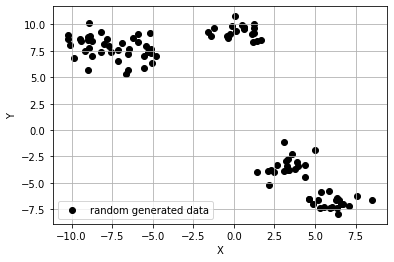

In [2]:
#축 그리기
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

#위에서 생성한 점 데이터들을 pandas DataFrame 형태로 변환하기
points_df = pd.DataFrame(points, columns=['X','Y'])
display(points_df.head())

#점 데이터를 X-Y grid에 시각화하기
ax.scatter(points[:, 0], points[:, 1], c='black', label='random generated data')

#축 이름을 라벨에 달고, 점 데이터 그리기
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

sklearn 의 make_blob()을 활용하여 중심점이 5개인 무작위의 점 데이터 100개를 생성해 보았습니다.

한눈에 보기에도 위 데이터들은 5개의 군집을 이루고 있는것 처럼 보이는데요, 과연 K-means 알고리즘을 적용하여 위 데이터들을 올바르게 군집화 할 수 있는지 알아봅시다.



2.생성한 데이터에 K-means 알고리즘 적용

그런데, 데이터들 끼리의 거리를 어떻게 측정하는 걸까요?

실은 우리는 위에서 자연스럽게 데이터를 X-Y좌표축 위에 생성했습니다.

피타고라스 정리를 응용하여 계산한 좌표축 사이의 두 저 사이의 직선 거리를 

유클리드거리(Eucledian distance) 또는 L2 Distance 라고 부릅니다.


전체적인 K-means 알고리즘의 순서

원하는 클러스터의 수(K)를 결정합니다.

무작위로 클러스터의 수와 같은 k개의 중심점(centroid)을 선정합니다.

이들은 각각의 클러스터를 대표합니다.

나머지 점들과 모든 중심점 간의 유클리드 거리를 계산한 후, 가장 가까운 거리를가지는 중심점의 클러스터에 속하도록 합니다.

각 K개의 클러스터의 중심점을 재조정합니다.

특정 클러스터에 속하는 모든 점들의 평균값이 해당 클러스터 다음 iteration의 중심점이 됩니다.

재조정된 중심점을 바탕으로 모든 점들과 새로 조정된 중심점 간의 유클리드 거리를 다시 계산한 후, 가장 가까운 거리를 가지는 클러스터에 해당 점을 재배정 합니다.

4번과 5번을 반복 수행 합니다. 반복의 횟수는 사용자가 적절히 조절하면 되고, 특정 iteration 이상이 되면 수렴(중심점이 더이상 바뀌지 않음)하게 됩니다.

In [3]:
from sklearn.cluster import KMeans

# 1), 2) 위에서 생성한 무작위 점 데이터(points) 에 클러스터의 수(K)가 5인 K-means 알고리즘을 적용
kmeans_cluster = KMeans(n_clusters=5)

# 3)~6) 과정이 전부 함축되어 있는 코드입니다. points에 대하여 K가 5일 때의 K-means iteration을 수행
kmeans_cluster.fit(points)

print(type(kmeans_cluster.labels_))
print()
print(np.shape(kmeans_cluster.labels_))
print()
print(np.unique(kmeans_cluster.labels_))

<class 'numpy.ndarray'>

(100,)

[0 1 2 3 4]


K-means 결과를 시각화해서 확인

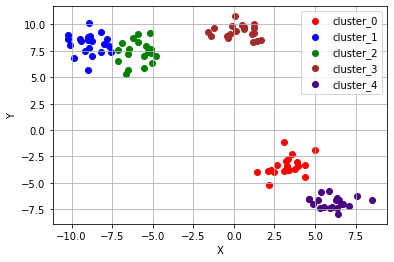

In [5]:
#n번째 클러스터 데이터를 어떤 색으로 도식할 지 결정하는 color dictionary
color_dict = {0: 'red', 1: 'blue', 2:'green', 3:'brown', 4:'indigo'}

#점 데이터를 X-Y grid에 시각화 합니다
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

#K-means clustering 의 결과대로 색깔별로 구분하여 점에 색칠한 후 도식
for cluster in range(5):
  #전체 무작위 점 데이터에서 K-means 알고리즘에 의해 군집화된 sub_data를 분리합니다.
  cluster_sub_points = points[kmeans_cluster.labels_ == cluster] 
  ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:,1], c=color_dict[cluster], label='cluster_{}'.format(cluster))

#축 이름을 라벨에 달고, 점데이터 그리기
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

우리가 중심점 5개인 무작위 데이터를 생성하고 나서, 이를 K-means 알고리즘을 활용해 5개의 군집으로 분류한 결과가 위와 같습니다.

예상했ㅅ던 것처럼 5개의 그룹이 잘 분리된 것으로 보아 k-means 알고리즘은 군집의 수만 주어진다면 데이터 군집화를 잘 수행한다는것을 확인할 수 있어요.

K-means 알고리즘이 항상 만능 열쇠는 아닙니다. 

데이터의 분포에 따라 의도하지 않은 결과를 초래할 수 있어요.

3. K-means 알고리즘이 잘 동작하지 않는 예시들

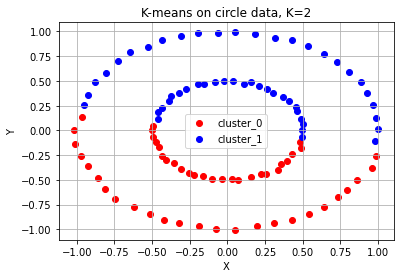

In [7]:
# K-means algorithm이 잘 동작하지 않는 예시 (1) 원형 분포
from sklearn.datasets import make_circles
# 원형 분포 데이터 생성
circle_points, circle_labels = make_circles(n_samples=100, factor=0.5, noise=0.01) # 원형 분포를 가지는 점 데이터 100개를 생성합니다.
# 캔버스 생성
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# 원형 분포에 대해 K-means 수행
circle_kmeans = KMeans(n_clusters=2)
circle_kmeans.fit(circle_points)
color_dict = {0: 'red', 1: 'blue'}
for cluster in range(2):
  cluster_sub_points = circle_points[circle_kmeans.labels_ == cluster]
  ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('K-means on circle data, K=2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

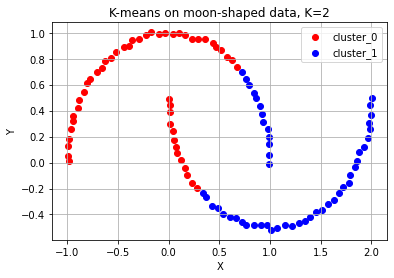

In [8]:
# K-means algorithm이 잘 동작하지 않는 예시 (2) 달 모양 분포
from sklearn.datasets import make_moons
# 달 모양 분포의 데이터 생성
moon_points, moon_labels = make_moons(n_samples=100, noise=0.01) # 달 모양 분포를 가지는 점 데이터 100개를 생성합니다.
# 캔버스 생성
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# 달 모양 분포 데이터 plot
moon_kmeans = KMeans(n_clusters=2)
moon_kmeans.fit(moon_points)
color_dict = {0: 'red', 1: 'blue'}
for cluster in range(2):
  cluster_sub_points = moon_points[moon_kmeans.labels_ == cluster]
  ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('K-means on moon-shaped data, K=2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()


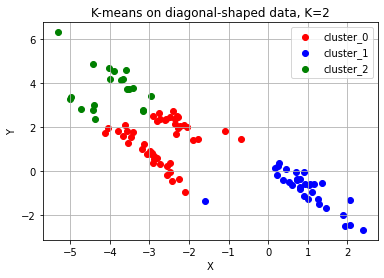

In [10]:
# K-means algorithm이 잘 동작하지 않는 예시 (3) 대각선 모양 분포
from sklearn.datasets import make_circles, make_moons, make_blobs
# 대각선 모양 분포의 데이터 생성
diag_points, _ = make_blobs(n_samples=100, random_state=170) #대각선 분포를 가지는 점 데이터 100개를 생성합니다.(현재는 무작위 분포)
transformation = [[0.6, -0.6], [-0.4, 0.8]] #대각선 변환을 위한 대각 행렬
diag_points = np.dot(diag_points, transformation) #본 과정을 통해 무작위 분포의 점 데이터를 대각선 분포로 변환합니다.
# 캔버스 생성
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# 대각선 모양 분포 데이터 plot
diag_kmeans = KMeans(n_clusters=3)
diag_kmeans.fit(diag_points)
color_dict = {0: 'red', 1: 'blue', 2: 'green'}
for cluster in range(3):
  cluster_sub_points = diag_points[diag_kmeans.labels_ == cluster]
  ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('K-means on diagonal-shaped data, K=2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()


이러한 예시를 통해, K-means 알고리즘은 다음과 같은 상황에서는 적합하지 않은 군집화 알고리즘이라는 것을 알수 있다.

1. 군집의 개수(K값)를 미리 지정해야 하기 때문에 이를 알거나 예측하기 어려운 경우에는 사용하기 어렵다

2. 유클리드 거리가 가까운 데이터끼리 군집이 형성되기 떄문에 데이터의 분포에 따라 유클리드 거리가 멀면서 밀접하게 연관되어 있는 데이터들의 군집화를 성공적으로 수행하지 못할 수 있다.


클러스터링(2) DBSCAN

DBSCAN(Density Based Spatial Clustering of Applications with Noise) 더럽게기네

알고리즘은 가장 널리 알려진 밀도(density)기반의 군집 알고리즘입니다.

DBSCAN 알고리즘의 가장 큰 특징중 하나는 군집의 개수, 즉 K-means 알고리즘에서의 K값을 미리 지정할 필요가 없다는 점.

또한 유클리드 거리 기반의 K-means 알고리즘 방식과 달리, 조밀하게 몰려 있는 클러스터를 군집화 하는 방식을 사용하기 때문에 원 모양의 군집이 아닌 불특정한 형태의 군집도 찾을수 있다.



1. DBSCAN 알고리즘의 동작

DBSCAN 알고리즘을 본격적으로 설명하기 전에 DBSCAN을 이해하는 데 필요한 변수와 용어정리가 필요.

- epsilon: 클러스터의 반경

- minPts: 클러스터를 이루는 개체의 최솟값

- core point : 반경 epsilon 내에 minPts 개 이상의 점이 존재하는 중심점

- border point: 군집의 중심이 되지는 못하지만, 군집에 속하는점

- noise point: 군집에 포함되지 못하는점

K-means에서 K값을 미리 지정해야 했다면, DBSCAN에서는 epsilon과 minPts값이 미리 지정해 주어야 하는 변수라는 것을 기억해라.

DBSCAN 알고리즘 동작 순서

임의의점 p를 설정하고, p를 포함하여 주어진 클러스터의 반경(epsilon)안에 포함되어 있는 점들의 갯수를 센다.

만일 해당 원에 minPts개 이상의 점이 포함되어 있으면, 해당 점 p를 core point로 간주하고 원애 포함된 점들을 하나의 클러스터로 묶는다.

해당원에 minPts개 미만의 점이 포함되어 있으면, 일단 pass합니다.

모든 점에 돌아가면서 1~3번의 과정을 반복하는데, 만일 새로운 점 p'가 core point가 되고 이 점이 기존의 클러스터(p를 corepoint로 하는) 에 속한다면, 두개의 클러스터는 연ㄱ결되어 있다고 하며 하나의 클러스터로 묶어준다.

모든 점에 대하여 클러스터링 과정을 끝냈는데, 어떤 점을 중심으로 하더라도 클러스터에 속하지 못하는 점이 있으면 이를 noise point로 간주한다.

또한 특정 군집에는 속하지만 core point가 아닌 점들을 border point라고 칭한다.



2. DBSCAN 알고리즘 적용해보기


# of cluster: 2
DBSCAN Y-hat: [0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1
 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0]
# of cluster: 2
DBSCAN Y-hat: [0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0
 1 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0
 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1]
# of cluster: 3
DBSCAN Y-hat: [ 0  1  1  0  0  2  2  0  1  2  2  2  0  2  0  1  2  2  2  1  1  1  1  1
  2  2  0  1  0  2  1  0  2  1  2  0  0  0  0  0  1  0  1  0  0  2  1  1
  0  2  1  1  2  1  0  2 -1  2  0  0  2  0  0  1  0  1  1  2  2  2 -1  0
  2  0  0  0  1  2  2 -1  2  2  1  2  0  0  2  1  1  2  1  1  2  0 -1  1
  0  0  0  1]


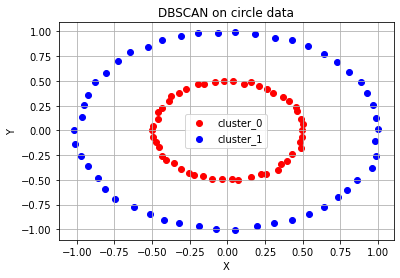

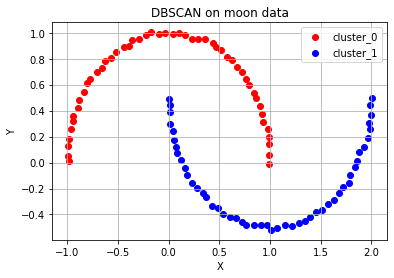

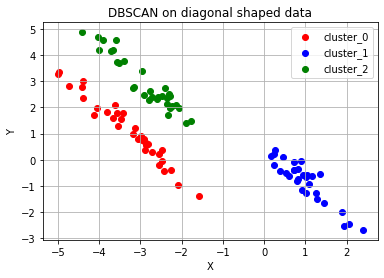

In [13]:
# DBSCAN으로 circle, moon, diagonal shaped data를 군집화한 결과
from sklearn.cluster import DBSCAN
fig = plt.figure()
ax= fig.add_subplot(1, 1, 1)
color_dict = {0: 'red', 1: 'blue', 2: 'green', 3:'brown',4:'purple'} # n 번째 클러스터 데이터를 어떤 색으로 도식할 지 결정하는 color dictionary
# 원형 분포 데이터 plot
epsilon, minPts = 0.2, 3 # 2)와 3) 과정에서 사용할 epsilon, minPts 값을 설정
circle_dbscan = DBSCAN(eps=epsilon, min_samples=minPts) # 위에서 생성한 원형 분포 데이터에 DBSCAN setting
circle_dbscan.fit(circle_points) # 3) ~ 5) 과정을 반복
n_cluster = max(circle_dbscan.labels_)+1 # 3) ~5) 과정의 반복으로 클러스터의 수 도출
print(f'# of cluster: {n_cluster}')
print(f'DBSCAN Y-hat: {circle_dbscan.labels_}')
# DBSCAN 알고리즘의 수행결과로 도출된 클러스터의 수를 기반으로 색깔별로 구분하여 점에 색칠한 후 도식
for cluster in range(n_cluster):
  cluster_sub_points = circle_points[circle_dbscan.labels_ == cluster]
  ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('DBSCAN on circle data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()
# 달 모양 분포 데이터 plot - 위와 같은 과정 반복
fig = plt.figure()
ax= fig.add_subplot(1, 1, 1)
color_dict = {0: 'red', 1: 'blue', 2: 'green', 3:'brown',4:'purple'} # n 번째 클러스터 데이터를 어떤 색으로 도식할 지 결정하는 color dictionary
epsilon, minPts = 0.4, 3
moon_dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
moon_dbscan.fit(moon_points)
n_cluster = max(moon_dbscan.labels_)+1
print(f'# of cluster: {n_cluster}')
print(f'DBSCAN Y-hat: {moon_dbscan.labels_}')
for cluster in range(n_cluster):
  cluster_sub_points = moon_points[moon_dbscan.labels_ == cluster]
  ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('DBSCAN on moon data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()
# 대각선 모양 분포 데이터 plot - 위와 같은 과정 반복
fig = plt.figure()
ax= fig.add_subplot(1, 1, 1)
color_dict = {0: 'red', 1: 'blue', 2: 'green', 3:'brown',4:'purple'} # n 번째 클러스터 데이터를 어떤 색으로 도식할 지 결정하는 color dictionary
epsilon, minPts = 0.7, 3
diag_dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
diag_dbscan.fit(diag_points)
n_cluster = max(diag_dbscan.labels_)+1
print(f'# of cluster: {n_cluster}')
print(f'DBSCAN Y-hat: {diag_dbscan.labels_}')
for cluster in range(n_cluster):
  cluster_sub_points = diag_points[diag_dbscan.labels_ == cluster]
  ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('DBSCAN on diagonal shaped data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

epsilon 과 minPts 값을 잘 조절해주면 DBSCAN 알고리즘에 따라 클러스터의 수를 명시해주지 않아도 적절한 클러스터의 개수를 설정하여 데이터에 대한 군집화를 수행할 수 있다.

클러스터의 수를 지정해주고, 데이터의 분포를 신경써야 하는 K-means 알고리즘에 비해 훨씬 유연한 사용이 가능하기 때문에 DBSCAN은 굉장히 보편적으로 사용되는 군집화 알고리즘이다.

3.DBSCAN알고리즘과 K-means 알고리즘의 소요 시간 비교


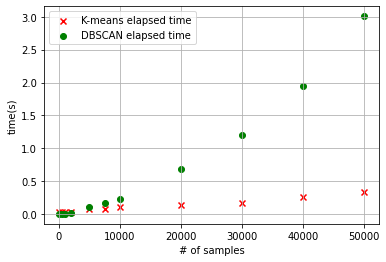

In [16]:
#DBSCAN알고리즘과 K-means 알고리즘의 시간을 비교하는 코드
import time

n_samples= [100, 500, 1000, 2000, 5000, 7500, 10000, 20000, 30000, 40000, 50000]

kmeans_time = []
dbscan_time = []
x = []
for n_sample in n_samples:
  #원형의 분포를 가지는 데이터 생성
  dummy_circle, dummy_labels = make_circles(n_samples=n_sample, factor=0.5, noise=0.01)

  kmeaens_start = time.time()
  circle_kmeans = KMeans(n_clusters=2)
  circle_kmeans.fit(dummy_circle)
  kmeans_end = time.time()

  dbscan_start = time.time()
  epsilon, minPts = 0.2, 3
  circle_dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
  circle_dbscan.fit(dummy_circle)
  dbscan_end = time.time()
  x.append(n_sample)
  kmeans_time.append(kmeans_end-kmeaens_start)
  dbscan_time.append(dbscan_end-dbscan_start)
 
# K-means와 DBSCAN의 소요 시간 그래프화

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, kmeans_time, c='red', marker='x', label='K-means elapsed time')
ax.scatter(x, dbscan_time, c='green', label='DBSCAN elapsed time')
ax.set_xlabel('# of samples')
ax.set_ylabel('time(s)')
ax.legend()
ax.grid()


위에서 알 수 있듯이, 데이터의 수가 적을 때는 K-means 알고리즘의 수행시간이 DBSCAN에 비해 더 길었으나,

군집화할 데이터의 수가 많아질수록 DBSCAN의 알고리즘 수행시간이 급격하게 늘어나게 됩니다. 

또한 클러스터의 수를 지정해 줄 필요가 없으나 데이터 분포에 맞는 epsilon과 minPts의 값을 지정해 주어야 한다는 점 등이 단점으로 여겨지네요.

차원축소(1) PCA

비지도 학습의 대표적인 방법 중 하나로 주성분분석(PCA)이라는 차원축소(Dimensionality reduction)알고리즘이 있다.

비지도학습의 방법으로 차원 축소를 왜 사용하는지에 대해서도 한번 알아볼 필요가 있겠다.

예전에는 모르는것이 있을때, 필요한 정보를 찾을수 있는 공간이 한정되어 있었다.

하지만 지금은 검색만 하면 바로 찾아볼수 있는 정도를 넘어 불필요한 정보들을 너무 많이 제공하기도 해서, 내가 원하는 정보와 원치 않는 정보를 분류하기 힘든 경우도 많다.

이런 경우에 우선순위를 정해서 해당 요소를 기준으로 필터링을 하고, 특정 요소는 고려하지 않는다.

PCA를 제대로 이해하기 위해서는 선형대수라는 수학분야의 기초지식이 필요하다.

    PCA는 데이터 분포의 주성분을 찾아주는 방법이다.

    여기서 주성분이라는 의미는 데이터의 분산이 가장 큰 방향 벡터를 의미한다.

    PCA는 데이터들의 분산을 최대로 보존하면서, 서로 직교(orthogonal)하는 기저(basis, 분산이 큰 방향 벡터의축)들을 찾아 고차원 공간을 저차원 공간으로 사영(projection)한다.

    또한 PCA에서는 기존 feature 중 중요한 것을 선택하는 방식이 아닌 기존의 feature를 선형 결합(linear combination)하는 방식을 사용한다.


여기서 직교(orthgonal), 기저(basis), 사영(projection), 선형결합(linear combination)이라는 수학 용어가 등장하는데,

데이터들을 X-Y 좌표축 상에 표현하면 데이터가 X성분과 Y성분으로 나위어 표현된다는 것을 알수있다. 

예를들어 (1,1) 이라면 X방향만큼1, Y방향만큼1 위치에 존재하는 데이터라는 뜻

만약 우상향 방향의 긴 화살표와 좌상향 방향의 짧은 화살표 방향을 좌표축으로 삼으면 어떨까?

각각을 새로은 X' Y' 좌표축이라고 한다면, 아마 좌표값은 다르겠지만 얼마든지 같은 데이터를 새로운 좌표계로 변환해서 표현할수 있다.

이렇게 새로운 좌표계 역할을 할 수 있는 벡터의 모음을 기저(basis)라고 한다.

그래서 우리가 사용하는 좌표값이란, 실은 기저의 선형 결합으로 표현된 것이다. (1,1)이란 X방향1, Y방향 1의 선형 결합일뿐

타원형 분포로 되어있는 데이터들이 있을 때, 차원의 수는 줄이면서 데이터 분포의 분산을 최대한 유지하기 위해 가장 분산이 긴 축을 첫 기저로 잡고, 그 기저에 직교하는 축 중 가장 분산이 큰 값을 다음 기저로 잡게 된다.

이 과정을 반복하게 되면 차원의 수를 최대로 줄이면서 데이터 분포의 분산을 그대로 유지할 수 있다.

이것을 차원 축소라고 한다.

(원통형 을 원과 선으로 나눈다)

여러개의 차원으로 구성된 데이터들을 2개의 차원으로 축소해도 정보의 손실을 최소화하여 데이터의 분포를 충분히 표현 할 수 있다는 의미다.

여기서 차원축소의 핵심 개념으로 사영(projection)이라는 용어가 등장하는데,

X-Y-Z 좌표축상에 존재하는 데이터를 X-Y, Y-Z좌표축에 사영(projection)했다는 것은

각각 Z, X 좌표축을 무시했다는 뜻이된다.

그러면 무시한 데이터만큼의 정보손실이 일어난다.

원본 데이터의 특성을 상대적으로 잘 살리면서 차원을 1개 줄인 것은 X-Y 일까 Y-Z일까 

아무래도 X-Y다. 그렇다면 Z축 방향의 정보는 상대적으로 덜 중요하다(수학적으로는 Z축 방향의 분산이 작다)고 할 수 있다.

PCA는 차원축소를 시도하되, 주어진 좌표축 방향이 아니라, 가장 분산이 길게 나오는 기저(basis)방향을 찾아서 그 방향의 기저만 남기고 덜 중요한 기저 방향을 삭제하는 방식으로 진행됩니다. 이렇게 찾은 가장 중요한 기저를주성분(Principal Component)방향,또는 pc축 이라고 한다.

1.데이터 개요

In [18]:
#차원축소 예제: 유방암 데이터셋 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

#데이터 로드
cancer = load_breast_cancer()

#y = 0(Malignant - 악성종양), y=1(Benign - 양성종양)
cancer_X, cancer_y = cancer.data, cancer['target']
train_X, test_X, train_y, test_y = train_test_split(cancer_X, cancer_y, test_size=0.1, random_state=10)
print("전체 검사자 수: {}".format(len(cancer_X)))
print("Train dataset에 사용되는 검사자 수: {}".format(len(train_X)))
print("Test dataset에 사용되는 검사자 수: {}".format(len(test_X)))
cancer_df = pd.DataFrame(cancer_X, columns=cancer['feature_names'])
cancer_df.head()

전체 검사자 수: 569
Train dataset에 사용되는 검사자 수: 512
Test dataset에 사용되는 검사자 수: 57


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


차원 축소를 위해 sklearn 라이브러리에서 불러온 유방암 데이터셋이다.

유방암 데이터셋을 훈련, 테스트 셋으로 나누고, 각가에 PCA를 적용해 볼거다.

그리고 나서 차원축소를 적용하지 않은 original data와 PCA를 적용한 data를 이용해

SVM classifier를 훈련시킨후, 각각의 테스트 데이터셋을 통해 정확도를 확인해 PCA가 어떤 효과를 가져다 주는지 확인해보자

2.유방암 데이터셋에 PCA 알고리즘 적용 예제


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.metrics import accuracy_score
from collections import Counter

#color dictionary
color_dict = {0: 'red', 1: 'blue', 2:'red', 3:'blue'}
target_dict = {0: 'malignant_train', 1: 'benign_train', 2: 'malignant_test', 3:'benign_test'}

#Train data에 PCA 알고리즘 적용
train_X_ = StandardScaler().fit_transform(train_X)
train_df = pd.DataFrame(train_X_, columns=cancer['feature_names'])
pca = PCA(n_components=2) # 주성분의 수를 2개 , 즉 기저가 되는 방향 벡터를 2개로하는 pca알고리즘수행
pc = pca.fit_transform(train_df)


여기서 StandScaler().fit_trainsform() 과정을 수행하는 이유는 각 열마다의 값의 범위가 전부 달라서다.

예를들어 첫번째와 두번째 열 데이터인 mean radius 와 mean texture의 범위는 다른데 

두 값이 전부 5라는 값을 가진다고 해서 같은 영향을 준다고 취급하면 안된다.



In [21]:
#Test data에 PCA 알고리즘 적용
test_X_ = StandardScaler().fit_transform(test_X)
test_df = pd.DataFrame(test_X_, columns=cancer['feature_names'])
pca_test = PCA(n_components=2)
pc_test = pca_test.fit_transform(test_df)

In [22]:
# 훈련한 classifier의 decision boundary를 그리는 함수
def plot_decision_boundary(X, clf, ax):
  h = .02 # step size in the mesh
  # create a mesh to plot in
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  ax.contour(xx, yy, Z, cmap='Blues')

# PCA를 적용한 train data의 classifier 훈련: classfier로 Support Vector Machine(SVM) 사용
clf = svm.SVC(kernel = 'rbf', gamma=0.5, C=0.8) # 여기서는 classifier로 SVM을 사용한다는 정도만 알아둡시다!
clf.fit(pc, train_y) # train data로 classifier 훈련

# PCA를 적용하지 않은 original data의 SVM 훈련
clf_orig = svm.SVC(kernel = 'rbf', gamma=0.5, C=0.8) # 여기서는 classifier로 SVM을 사용한다는 정도만 알아둡시다!
clf_orig.fit(train_df, train_y)

SVC(C=0.8, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

여기서 서포트 벡터 머신 분류기(SVM classifier)를 훈련시켜준다. 

이 SVM classifier는 주성분(PC)을 기반으로 해당 점이 양성인지 악성인지를 구분해주는 결정 경계선(decision boundary)에 해당하는데, 

train data에 맞게 경계선이 그어질 수 있도록 이를 훈련시키는 단계에 해당한다.

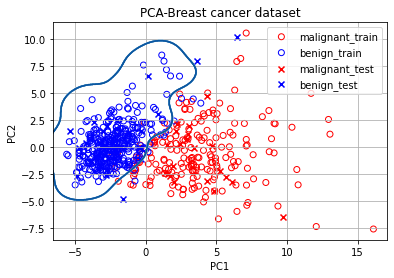

In [24]:
# 캔버스 도식
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# malignant와 benign의 SVM decision boundary 그리기
plot_decision_boundary(pc, clf, ax)

#Train data 도식
for cluster in range(2):
  sub_cancer_points = pc[train_y == cluster]
  ax.scatter(sub_cancer_points[:, 0], sub_cancer_points[:, 1], edgecolor=color_dict[cluster], c='none', label=target_dict[cluster])

#Test data 도식
for cluster in range(2):
  sub_cancer_points = pc_test[test_y == cluster]
  ax.scatter(sub_cancer_points[:, 0], sub_cancer_points[:, 1], marker= 'x', c=color_dict[cluster+2], label=target_dict[cluster+2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCA-Breast cancer dataset')
ax.legend()
ax.grid()

# Scoring
pca_test_accuracy_dict = Counter(clf.predict(pc_test) == test_y)
orig_test_accuracy_dict = Counter(clf_orig.predict(test_df) == test_y)


단 두개의 주성분 feature 만으로 분류한 PCA classfier의 정확도가 30개의 feature를 모두 사용한 original classfier보다 훨씬 높은 정확도를 보여준다

모든 feature를 이용한 방식의 정확도가 더 낮은 이유중 하나는 바로 제공된 30개의 feature 중 종양의 악성 양성과 관련 없는것이 존재해서 해당 feature가 오히려 분류를 방해했기 때문

그래서 feature의 수가 적더라도 악성/양성과 관련이 깊은 중요한 feature 만을 이용한 분류의 정화도가 훨씬 높을수 있다.

위에서 살펴보앗듯 PCA는 각  feature 간 상관관계가 있고 이를 추릴 필요가 있을 때 유용하게 사용되는 비지도 학습 방법 중 하나다

차원축소(2) T-SNE

이번엔 T-SNE(T-Stochastic Neighbor Embedding)라는, 시각화에서 많이 쓰는 알고리즘을 배워보려 한다.

우리의 현실세계는 3차원이며, 우리는 그 이상의 차원을 표현하거나 눈으로 보고 인지하기 어렵다.

이런이유로 우리는 고차원 데이터를 1~3차원 으로 불러들여와야 비로소 데이터를 시각적으로 이해 가능

PCA는 주로 선형적인 데이터의 분포(키와 몸무게 등)을 가지고 있을때, 정보가 잘 보존됨

방사형적, 비선형적 데이터에서는 많은 정보량을 담기 위한 주성분으로 잡을 선형적인 축을 찾기 어렵다

따라서 PCA를 이용해 2차원으로 표현한다면 멀리있는 데이터가 가까이 있도록 차원 축소가 이루어 질것이다.

시각화 하여 데이터를 이해한다는 목적과는 잘 맞지 않는다.

T-SNE 는 기존 차원의 공간에서 가까운 점들은, 차원축소된 공간에서도 여전히 가깝게 유지 되는 것을 목표로 하고 있다.

이 특징 덕분에 MNIST의 785차원 숫자 이미지를 2차원으로 시각화하여도, 같은 숫자의 이미지끼리 유사한 거리에 놓이는것을 확인할 수 있다.

즉, PCA는 데이터가 가진 고유한 물리적 정보량을 보존하는데 주력하지만,

T-SNE 는 고유한 물리적 정보량 보다는 데이터들간의 상대적 거리를 보존하는데 주력



사이킷런에서 MNIST 데이터 불러오기

In [26]:
from sklearn.datasets import fetch_openml
# 784 pixel로 이뤄진 mnist 이미지 데이터 호출
mnist = fetch_openml("mnist_784",version=1)

X = mnist.data / 255.0
y = mnist.target
print("X shape: ",X.shape)
print("Y shape: ",y.shape)


n_image = X.shape[0]
n_image_pixel = X.shape[1]
pixel_columns = [ f"pixel{i}" for i in range(n_image_pixel) ] # 픽셀정보가 있는 칼럼의 이름을 담은 목록
len(pixel_columns)

X shape:  (70000, 784)
Y shape:  (70000,)


784

사용하기 쉽게 판다스 데이터 프레임으로 만들어준다.

In [27]:
import pandas as pd
df = pd.DataFrame(X,columns=pixel_columns)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i)) # 숫자 라벨을 스트링으로 만드는 함수를 파이썬 람다 문법으로 전체 데이터에 적용합니다.
X, y = None, None

7만개 이미지 데이터중 1만개를 랜덤 샘플링

In [28]:
import numpy as np
# 결과가 재생산 가능하도록 랜덤 시드를 지정합니다.
np.random.seed(30)

# 이미지 데이터의 순서를 랜덤으로 뒤바꾼(permutation) 배열을 담습니다.
rndperm = np.random.permutation(n_image)

# 랜덤으로 섞은 이미지 중 10,000개를 뽑고, df_subset에 담습니다.
n_image_sample = 10000
random_idx = rndperm[:n_image_sample]
df_subset = df.loc[rndperm[:n_image_sample],:].copy()
df_subset.shape

(10000, 786)

In [31]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.gray()
fig = plt.figure( figsize=(10,6) )
n_img_sample = 15
width,height = 28,28


<Figure size 432x288 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [33]:

# 15개 샘플을 시각화해 봅니다.
for i in range(0,n_img_sample):
  row = df_subset.iloc[i]
  ax = fig.add_subplot(3,5,i+1, title=f"Digit: {row['label']}")
  ax.matshow(row[pixel_columns]
             .values.reshape((width,height))
             .astype(float))
plt.show()


PCA를 이용한 MNIST 차원축소 

사이킷런에서 제공하는 PCA 모듈을 사용하여 차원을 축소할 수 있습니다.

In [34]:
from sklearn.decomposition import PCA
print("df_subset의 shape: {}".format(df_subset.shape))
n_dimension = 2 # 축소시킬 목표 차원의 수
pca = PCA(n_components=n_dimension)
pca_result = pca.fit_transform(df_subset[pixel_columns].values) # 차원을 축소한 결과
df_subset['pca-one'] = pca_result[:,0] # 축소한 결과의 첫 번째 차원 값
df_subset['pca-two'] = pca_result[:,1] # 축소한 결과의 두 번째 차원 값
print("pca_result의 shape: {}".format(pca_result.shape))

df_subset의 shape: (10000, 786)
pca_result의 shape: (10000, 2)


Principal Component 별로 보존하는 정보량을 확인합니다

차원을 축소한 댓가로 차원의 정보량 중 일부만 남게 됩니다.

sklearn의 PCA 모듈은 PC 축 마다 보존하는 정보량의 비율을 제시해 줍니다

In [35]:
print(f"pca-1: {round(pca.explained_variance_ratio_[0],3)*100}%")
print(f"pca-2: {round(pca.explained_variance_ratio_[1],3)*100}%")

pca-1: 9.6%
pca-2: 7.3%


784차원을 2차원으로 차원축소 하였을 때, 정보량이 전체의 16.9%가 남게 됩니다.


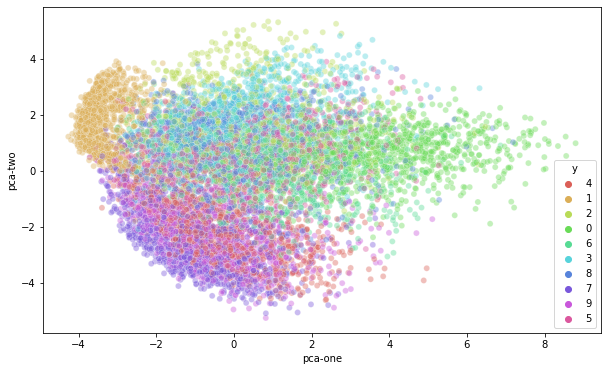

In [37]:
plt.figure(figsize=(10,6))
sns.scatterplot(
  x="pca-one", y="pca-two",
  hue="y",
  palette=sns.color_palette("hls", 10),
  data=df_subset, # 2개의 PC축만 남은 데이터프레임 df_subset 을 시각화해 보자.
  legend="full",
  alpha=0.4
)

이번에는 사이킷런에서 제공하는 TSNE 모듈을 사용하여 동일한 1만 개의 이미지 데이터의 차원을 축소해 봅시다.


In [38]:
from sklearn.manifold import TSNE
print("df_subset의 shape: {}".format(df_subset.shape))
data_subset = df_subset[pixel_columns].values
n_dimension = 2
tsne = TSNE(n_components=n_dimension)
tsne_results = tsne.fit_transform(data_subset)
print("tsne_results의 shape: {}".format(tsne_results.shape))

df_subset의 shape: (10000, 788)
tsne_results의 shape: (10000, 2)


In [ ]:
|# tsne 결과를 차원별로 추가합니다.
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
# 시각화해 봅니다.
plt.figure(figsize=(10,6))
sns.scatterplot(
x="tsne-2d-one", y="tsne-2d-two",
hue="y",
palette=sns.color_palette("hls", 10),
data=df_subset,
legend="full",
alpha=0.3
)


우리가 배워볼 T-SNE 는 기존 차원의 공간에서 가까운 점들은, 차원축소된 공간에서도 여전히 가깝게 유지 되는것을 목표로 하고 있습니다.

이 특징 덕분에 이후 실습에서 MNIST의 784 차원의 숫자 이미지를 2차원으로 시각화하여도, 같은 숫자의 이미지끼리 유사한거리에 놓이는 것을 확인할수 있습니다.

이것은 PCA와 구분되는 T-SNE의 뚜렷한 특징입니다.

PCA를 통해 차원축소를 하면서 발생하는 정보 손실의 과정 중에는 두 점 사이의 거리라는 중요한 정보가 함께 손실되는 측면이 있습니다.

만약 두 점의 거리가 PCA의 pc 축을 따라 발생한 거리라면 유지가 되겠지만

그렇지 않다면 PCA 과정을 통해 두 점 사이의 거리가 소거되고  실제로는 먼 거리의 점들이 아주 가까운 점으로 투영될 가능성이 있습니다.

그 결과로 이전 스텝에서 PCA의 시각화 화면을 보면 다른 숫자들 사이의 경계가 불분명할 정도로 분포가 뒤섞여 있는 것을 확인할 수 있습니다.


반면 T-SNE 에서는 고차원에서 먼 거리의 두 점은 저 차원에서도 먼 거리에 있어야 합니다.


그러므로 결과적으로 T-SNE 를 시각화하면 숫자들 사이의 경계가 뚜렷이 나타나는 장점이 있습니다.

그래서 T-SNE는 분류기의 Feature Extractor 모델이 카테고리간 분류 경계선을 뚜렷하게 유지하고 있는지를 확인하는 용도로
자주 쓰입니다.

그렇다면 T-SNE는 PCA보다 우월한 차원축소 기법일까요? 그렇지 않습니다.

T-SNE의 두 차우너은 물리적 의미를 가지지 않습니다. PCA는 정보 손실을 최소화 하려는 관점을 가지고 있으므로, 그결과 추춝된 PC축은 주성분이라는 물리적ㅇ 의미를 유지하고 있으며, 공분산을 통해 원본 데이터를 일정부분 복원할 수 있는 가능성을 가지고 있습니다. 

그러나 T-SNE는 정보 손실량에 주목하지 않으며, 그 결과 저차원 축이 아무런 물리적 의미를 가지지 못합니다. 오직 시각화에만 유리할 뿐입니다.
